<a href="https://colab.research.google.com/github/Kumarinishu/Nishu-Kumari-Machine-Learning-Intern-YBI/blob/main/Fake_News_Detection_Nishu_Project8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: **NISHU KUMARI**
# YBI FOUNDATION '**MACHINE LEARNING INTERN**'
### Batch: 18th July
### Project8: Fake News Detection using Machine Learning
### Dataset Links: 
####    True News: https://www.dropbox.com/s/l6gojm6mn9rosdo/True%20News.csv?dl=1

#### Fake News: https://www.dropbox.com/s/tlinvf90go2xngy/Fake%20News.csv?dl=1
                   


### Importing Libraries

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

### Reading the csv files

In [2]:
True_data = pd.read_csv('/content/sample_data/TrueNews.csv',error_bad_lines=False, engine="python")
Fake_data = pd.read_csv('/content/sample_data/FakeNews.csv',error_bad_lines=False, engine="python")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 407: unexpected end of data
Skipping line 405: unexpected end of data


In [3]:
True_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
400,Kushner told Flynn to contact Russians last ye...,"WASHINGTON (Reuters) - Jared Kushner, Presiden...",politicsNews,"December 1, 2017"
401,House ethics panel launches wide-ranging probe...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"December 1, 2017"
402,Republican Senator Daines says he will support...,WASHINGTON (Reuters) - Republican U.S. Senator...,politicsNews,"December 1, 2017"
403,Senate Republicans have 50 votes to pass tax b...,WASHINGTON (Reuters) - The No. 2 U.S. Senate R...,politicsNews,"December 1, 2017"


In [4]:
True_data.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
True_data.shape

(405, 4)

In [6]:
True_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [7]:
True_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    405 non-null    object
 1   text     405 non-null    object
 2   subject  405 non-null    object
 3   date     405 non-null    object
dtypes: object(4)
memory usage: 12.8+ KB


In [8]:
True_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
True_data.describe(include='all')

,title,text,subject,date
count,405,405,405,405
unique,405,403,1,32
top,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"December 7, 2017"
freq,1,2,405,29


In [10]:
Fake_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
398,Trump Praises Coast Guard’s Hurricane Relief ...,Leave it to Donald Trump to disrespect both th...,News,"September 10, 2017"
399,Florida GOP Official Tried To Murder A Teen W...,"Back in May, Republicans in Broward County ele...",News,"September 10, 2017"
400,‘Shoot At Hurricane Irma’ Facebook Event Take...,A Facebook event called Shoot At Hurricane Ir...,News,"September 10, 2017"
401,WATCH: Black Driver Bravely Shames Cop Who Dr...,"When you are Black in America, getting pulled ...",News,"September 10, 2017"


In [11]:
Fake_data.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [12]:
Fake_data.shape

(403, 4)

In [13]:
Fake_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [14]:
Fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    403 non-null    object
 1   text     403 non-null    object
 2   subject  403 non-null    object
 3   date     403 non-null    object
dtypes: object(4)
memory usage: 12.7+ KB


In [15]:
Fake_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [16]:
Fake_data.describe()

,title,text,subject,date
count,403,403,403,403
unique,403,403,1,105
top,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"October 1, 2017"
freq,1,1,403,9


In [17]:
True_data['Target']=['True']*len(True_data)
Fake_data['Target']=['Fake']*len(Fake_data)

In [18]:
data=True_data.append(Fake_data).sample(frac=1).reset_index().drop(columns=['index'])

In [19]:
data

,title,text,subject,date,Target
0,Beef Jerky Company Just Bit Off More Than It ...,"Jack Links, which is a very popular maker of b...",News,"September 21, 2017",Fake
1,Senator Collins says undecided on final tax bi...,WASHINGTON (Reuters) - Republican U.S. Senator...,politicsNews,"December 10, 2017",True
2,Liberal Group Trolls Trump At Roy Moore Rally...,Donald Trump held a rally for Alabama Senate c...,News,"December 9, 2017",Fake
3,Trump Judicial Nominee: Transgender Children ...,Donald Trump s nominee for a federal judgeship...,News,"September 20, 2017",Fake
4,Former Trump adviser interviewed in Congress i...,"WASHINGTON (Reuters) - Walid Phares, a former ...",politicsNews,"December 8, 2017",True
...,...,...,...,...,...
803,Trump Vows To Save America From ‘Curse’ Of Fu...,"In a pair of tweets on Thursday afternoon, Don...",News,"September 14, 2017",Fake
804,BREAKING: Martin ‘Pharma Bro’ Shkreli Has Bai...,Martin Shkreli quickly gained notoriety during...,News,"September 13, 2017",Fake
805,Factbox: Trump on Twitter (December 14) - Stoc...,The following statements were posted to the ve...,politicsNews,"December 15, 2017",True
806,New York governor questions the constitutional...,NEW YORK/WASHINGTON (Reuters) - The new U.S. t...,politicsNews,"December 28, 2017",True


In [20]:
data.head(10)

,title,text,subject,date,Target
0,Beef Jerky Company Just Bit Off More Than It ...,"Jack Links, which is a very popular maker of b...",News,"September 21, 2017",Fake
1,Senator Collins says undecided on final tax bi...,WASHINGTON (Reuters) - Republican U.S. Senator...,politicsNews,"December 10, 2017",True
2,Liberal Group Trolls Trump At Roy Moore Rally...,Donald Trump held a rally for Alabama Senate c...,News,"December 9, 2017",Fake
3,Trump Judicial Nominee: Transgender Children ...,Donald Trump s nominee for a federal judgeship...,News,"September 20, 2017",Fake
4,Former Trump adviser interviewed in Congress i...,"WASHINGTON (Reuters) - Walid Phares, a former ...",politicsNews,"December 8, 2017",True
5,Donald Trump Is Destroying The Country’s Repu...,"During the election, when Donald Trump wasn t ...",News,"November 17, 2017",Fake
6,Hawaiians Had The Perfect Signs To Infuriate ...,"Donald Trump stopped in Hawaii, which is total...",News,"November 4, 2017",Fake
7,WATCH: Black Driver Bravely Shames Cop Who Dr...,"When you are Black in America, getting pulled ...",News,"September 10, 2017",Fake
8,OOPS: Trump Judicial Nominee Didn’t Tell Cong...,This is a major conflict of interest that shou...,News,"November 13, 2017",Fake
9,"Trump on Twitter (Dec 22) - Tax cut, Missile d...",The following statements were posted to the ve...,politicsNews,"December 22, 2017",True


In [21]:
data.shape

(808, 5)

In [22]:
data.columns

Index(['title', 'text', 'subject', 'date', 'Target'], dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    808 non-null    object
 1   text     808 non-null    object
 2   subject  808 non-null    object
 3   date     808 non-null    object
 4   Target   808 non-null    object
dtypes: object(5)
memory usage: 31.7+ KB


In [24]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
Target     0
dtype: int64

In [25]:
data.describe()

,title,text,subject,date,Target
count,808,808,808,808,808
unique,808,806,2,137,2
top,Beef Jerky Company Just Bit Off More Than It ...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"December 7, 2017",True
freq,1,2,405,29,405


In [26]:
cat_tar=pd.get_dummies(data.Target)['Fake']

In [27]:
label_size = [cat_tar.sum(),len(cat_tar)-cat_tar.sum()]

([<matplotlib.patches.Wedge at 0x7f7b2acb9b90>,
 [Text(-1.199990929469308, 0.004665746605465535, 'Fake'),
  Text(1.199990929469308, -0.004665746605465682, 'True')],
 [Text(-0.6999947088570962, 0.002721685519854895, '49.9%'),
  Text(0.6999947088570962, -0.002721685519854981, '50.1%')])

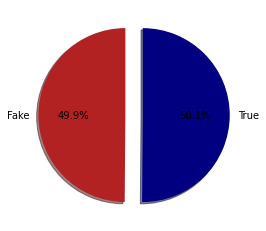

In [28]:
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

In [29]:
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder

In [30]:
data.title

0       Beef Jerky Company Just Bit Off More Than It ...
1      Senator Collins says undecided on final tax bi...
2       Liberal Group Trolls Trump At Roy Moore Rally...
3       Trump Judicial Nominee: Transgender Children ...
4      Former Trump adviser interviewed in Congress i...
                             ...                        
803     Trump Vows To Save America From ‘Curse’ Of Fu...
804     BREAKING: Martin ‘Pharma Bro’ Shkreli Has Bai...
805    Factbox: Trump on Twitter (December 14) - Stoc...
806    New York governor questions the constitutional...
807     Russians Fooled Dumbass Conservatives With Me...
Name: title, Length: 808, dtype: object

In [31]:
data.text

0      Jack Links, which is a very popular maker of b...
1      WASHINGTON (Reuters) - Republican U.S. Senator...
2      Donald Trump held a rally for Alabama Senate c...
3      Donald Trump s nominee for a federal judgeship...
4      WASHINGTON (Reuters) - Walid Phares, a former ...
                             ...                        
803    In a pair of tweets on Thursday afternoon, Don...
804    Martin Shkreli quickly gained notoriety during...
805    The following statements were posted to the ve...
806    NEW YORK/WASHINGTON (Reuters) - The new U.S. t...
807    If Hillary Clinton got into a fistfight with J...
Name: text, Length: 808, dtype: object

In [32]:
data.Target

0      Fake
1      True
2      Fake
3      Fake
4      True
       ... 
803    Fake
804    Fake
805    True
806    True
807    Fake
Name: Target, Length: 808, dtype: object

In [33]:
data['Target'].value_counts()

True    405
Fake    403
Name: Target, dtype: int64

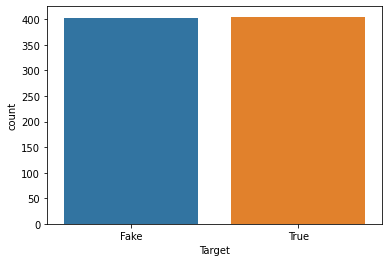

In [34]:
sns.countplot(data=data,x='Target')

In [35]:
labels=data.Target
labels.head(10)

0    Fake
1    True
2    Fake
3    Fake
4    True
5    Fake
6    Fake
7    Fake
8    Fake
9    True
Name: Target, dtype: object

### Spliting the data into training and testing

In [36]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(data['text'], labels, test_size=0.3, random_state=14278)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((565,), (243,), (565,), (243,))

### Evaluation

In [38]:
#Fake News Detection  - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#Fake News Detection  - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

## 1. **Passive Aggressive Classifier**

In [39]:
#Fake News Detection - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#Fake News Detection - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.18%


In [40]:
#Fake News Detection- Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','True'])

array([[  0,   0],
       [  0, 111]])

### Plotting confusion matrix for Passive Aggressive Classifier

              precision    recall  f1-score   support

        Fake       1.00      0.98      0.99       132
        True       0.98      1.00      0.99       111

    accuracy                           0.99       243
   macro avg       0.99      0.99      0.99       243
weighted avg       0.99      0.99      0.99       243



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


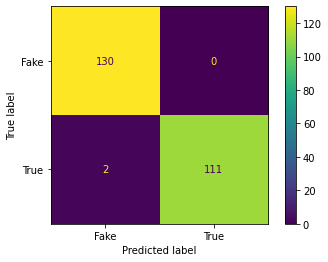

In [41]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(pac,tfidf_test,y_test)

## 2. **Multinomial naive bayes**

In [42]:
#Fake News Detection - Initialize a MultinomialNB(naive_bayes)
NB= MultinomialNB()
NB.fit(tfidf_train,y_train)
#Fake News Detection - Predict on the test set and calculate accuracy
y_pred=NB.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.24%


In [43]:
#Fake News Detection- Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','True'])

array([[  0,   0],
       [  0, 111]])

### Plotting confusion matrix for Multinomial naive bayes

              precision    recall  f1-score   support

        Fake       0.91      0.98      0.94       120
        True       0.98      0.90      0.94       123

    accuracy                           0.94       243
   macro avg       0.94      0.94      0.94       243
weighted avg       0.95      0.94      0.94       243



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


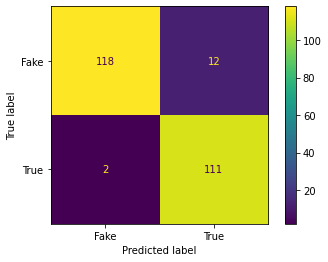

In [44]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(NB,tfidf_test,y_test)

## 3. **Logistic Regression**

In [45]:
#Fake News Detection - Initialize a Logistic Regression
LR= LogisticRegression(max_iter=1000)
LR.fit(tfidf_train,y_train)
#Fake News Detection - Predict on the test set and calculate accuracy
y_pred=LR.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 97.94%


In [46]:
#Fake News Detection- Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','True'])

array([[  0,   0],
       [  0, 111]])

### Plotting confusion matrix for Logistic Regression

              precision    recall  f1-score   support

        Fake       0.98      0.98      0.98       129
        True       0.98      0.97      0.98       114

    accuracy                           0.98       243
   macro avg       0.98      0.98      0.98       243
weighted avg       0.98      0.98      0.98       243



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


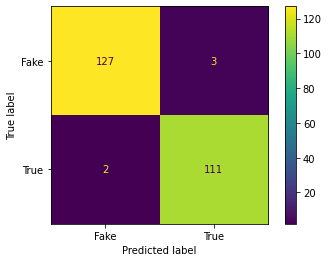

In [47]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(LR,tfidf_test,y_test)

## 4. **Linear SVC**

In [48]:
#Fake News Detection - Initialize a Linear SVC
L_SVC= LinearSVC()
L_SVC.fit(tfidf_train,y_train)
#Fake News Detection - Predict on the test set and calculate accuracy
y_pred=L_SVC.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.18%


In [49]:
#Fake News Detection- Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','True'])


array([[  0,   0],
       [  0, 111]])

### Plotting confusion matrix for Linear SVC

              precision    recall  f1-score   support

        Fake       1.00      0.98      0.99       132
        True       0.98      1.00      0.99       111

    accuracy                           0.99       243
   macro avg       0.99      0.99      0.99       243
weighted avg       0.99      0.99      0.99       243



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


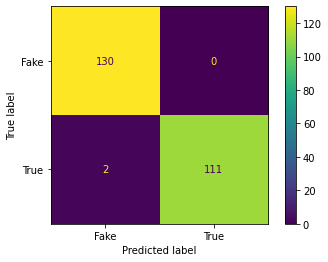

In [50]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(L_SVC,tfidf_test,y_test)

## Hence, the best model is Passive Aggressive Classifier and Linear SVC with an accuracy of 99.18%.

### Predicting the True/Fake news

In [51]:
pipe=Pipeline([('tfidf',TfidfVectorizer()),('PassiveAggressiveClassifier',PassiveAggressiveClassifier(max_iter=50))])

In [52]:
pipe.fit(data['text'],labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('PassiveAggressiveClassifier',
                 PassiveAggressiveClassifier(max_iter=50))])

In [53]:
Pred_News1=['Sean Penn is not exactly one to mince words, a...']
print(pipe.predict(Pred_News1))

['Fake']


In [54]:
Pred_News2=['TORONTO (Reuters) - Neo-Nazi website the Daily...']
print(pipe.predict(Pred_News2))

['True']


# **THANK YOU.....))**